In [1]:
# _*_ 可视化数据 _*_ #
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

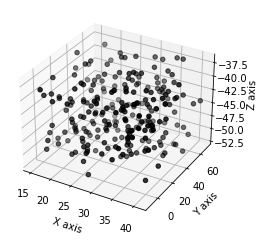

In [3]:
# _*_ 3D 散点图 _*_ #
# generate blank image
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 用 lambda 界定值域
n = 250 # points number
f = lambda minval, maxval, n: minval + (maxval - minval) * np.random.rand(n)
x_vals = f(15, 41, n)
y_vals = f(-10, 70, n)
z_vals = f(-52, -37, n)

# plot
ax.scatter(x_vals, y_vals, z_vals, c='k', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

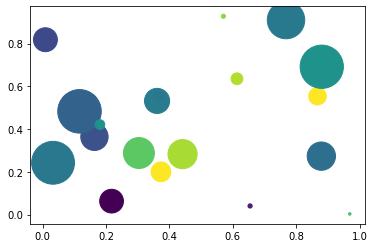

In [4]:
# _*_ 二维气泡图：每个圆圈的大小表示这个点的幅值 _*_ #
num_vals = 20
x = np.random.rand(num_vals)
y = np.random.rand(num_vals)

# 定义表示点的圆圈
max_radius = 25
area = np.pi * (max_radius * np.random.rand(num_vals)) ** 2
colors = np.random.rand(num_vals)
plt.scatter(x, y, s=area, c=colors, alpha=1.0)

plt.show()

<ipython-input-6-f87784a35b9d>:33: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  datapoints = np.zeros(num_points, dtype=[('position', float, 2), ('size', float, 1),('growth', float, 1),


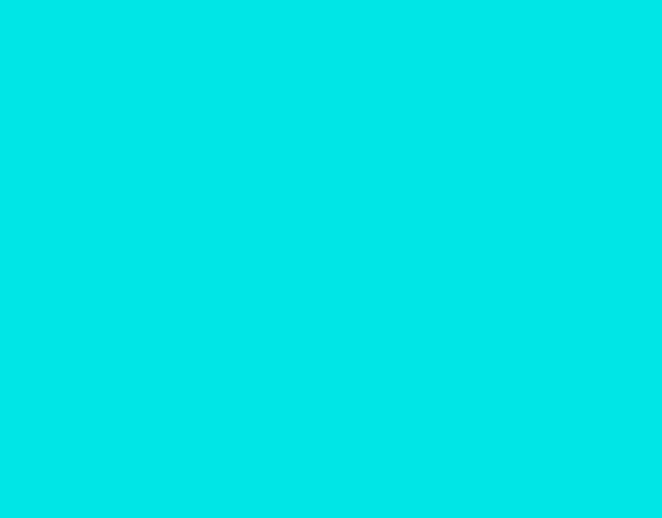

In [6]:
# _*_ 动态气泡图 _*_ #
from matplotlib.animation import FuncAnimation

# tracker: 动态更新气泡图
def tracker(cur_num):
    # 获取当前索引
    cur_index = cur_num % num_points
    # define color
    datapoints['color'][:, 3] = 1.0
    # 圆圈大小
    datapoints['size'] += datapoints['growth']
    
    # 更新集合中最老的数据点的位置
    datapoints['position'][cur_index] = np.random.uniform(0, 1, 2)
    datapoints['size'][cur_index] = 7
    datapoints['color'][cur_index] = (0, 0, 0, 1)
    datapoints['growth'][cur_index] = np.random.uniform(40, 150)
    
    # 更新散点图参数
    scatter_plot.set_edgecolors(datapoints['color'])
    scatter_plot.set_sizes(datapoints['size'])
    scatter_plot.set_offsets(datapoints['position'])
    
# main
fig = plt.figure(figsize=(9, 7), facecolor=(0,0.9,0.9))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

num_points = 20

# 用随机值定义数据点
datapoints = np.zeros(num_points, dtype=[('position', float, 2), ('size', float, 1),('growth', float, 1),
                                        ('color', float, 4)])
datapoints['position'] = np.random.uniform(0, 1, (num_points, 2))
datapoints['growth'] = np.random.uniform(40, 150, num_points)

# 创建一个每一帧都会更新的散点图
scatter_plot = ax.scatter(datapoints['position'][:, 0], datapoints['position'][:, 1],
                         s=datapoints['size'], lw=0.7, edgecolors=datapoints['color'],
                         facecolors='none')
# tracker 启动动态模拟
animation = FuncAnimation(fig, tracker, interval=10)
plt.show()

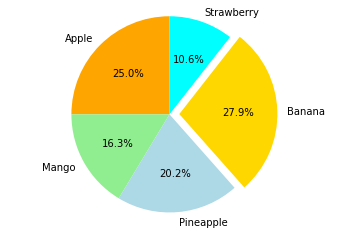

In [8]:
# _*_ 画饼图 _*_ #
data = {
    'Apple': 26,
    'Mango': 17,
    'Pineapple': 21,
    'Banana': 29,
    'Strawberry': 11
}

colors = ['orange', 'lightgreen', 'lightblue', 'gold', 'cyan']

# 定义一个变量，以突出饼图的一部分，否则都设为0
explode = (0, 0, 0, 0.1, 0)

# plot
plt.pie(data.values(), explode=explode, labels=data.keys(),
       colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)

# 设置饼图的宽高比，'equal' -> 圆形的
plt.axis('equal')

plt.show()

In [10]:
# _*_ 画日期格式的时间序列数据 _*_ #
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
import matplotlib.cbook as cbook
from matplotlib.ticker import Formatter

# 定义一个类，将日期格式化
class DataFormatter(Formatter):
    def __init__(self, dates, date_format='%Y-%m-%d'):
        self.dates = dates
        self.date_format = date_format
    
    # 提取 'position' 位置的时间值 t
    def __call__(self, t, position=0):
        index = int(round(t))
        if index >= len(self.dates) or index < 0:
            return ''
        return self.dates[index].strftime(self.date_format)
    
# main
# load apple stock from matplotlib
input_file = cbook.get_sample_data('aapl.csv', asfileobj=False)

# csv -> numpy
data = csv2rec(input_file)
data = data[-70:]

# date object
formatter = DataFormatter(data.date)

x_vals = numpy.arange(len(data))  # 时序
y_vals = data.close               # 收盘价

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.plot(x_vals, y_vals, 'o-')
fig.autofmt_xdate()
plt.show()

ImportError: cannot import name 'csv2rec' from 'matplotlib.mlab' (C:\Users\jichao1.wang\Anaconda3\lib\site-packages\matplotlib\mlab.py)

In [11]:
import matplotlib.cbook as cbook
input_file = cbook.get_sample_data('aapl.csv', asfileobj=False)
with open(input_file,'r') as f:
    print(f.read(100))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jichao1.wang\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\aapl.csv'

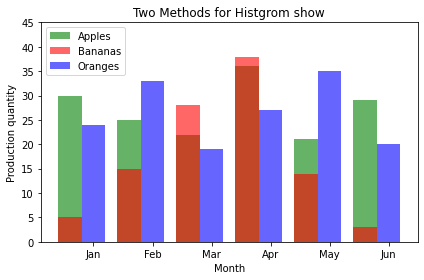

In [25]:
# _*_ 画直方图 _*_ #
import numpy as np
import matplotlib.pyplot as plt

apples = [30, 25, 22, 36, 21, 29]
oranges = [24, 33, 19, 27, 35, 20]
bananas = [int(x*40) for x in  np.random.rand(6)]
num_groups = len(apples)

fig, ax = plt.subplots()
# X-axis
indices = np.arange(num_groups)

# Histgrom width and opacity
bar_width = 0.4
opacity = 0.6

hist_apples = plt.bar(indices, apples, bar_width, alpha=opacity, color='g', label='Apples')
hist_bananas = plt.bar(indices, bananas, bar_width, alpha=opacity, color='r', label='Bananas')
hist_oranges = plt.bar(indices + bar_width, oranges, bar_width, alpha=opacity, color='b', label='Oranges')

plt.xlabel('Month')
plt.ylabel('Production quantity')
plt.title('Two Methods for Histogram show')
plt.xticks(indices + bar_width, ('Jan','Feb','Mar','Apr','May','Jun'))
plt.ylim([0, 45])
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
import numpy as np
print([int(x*40) for x in  np.random.rand(6)])

[15, 36, 31, 35, 34, 1]


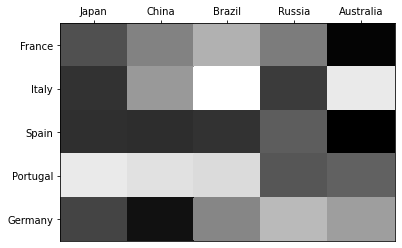

In [26]:
# _*_ 可视化热力图 _*_ #
# 当两组数据的各点具有一定的相关性时，热力图是一种适合的可视化展示（类比混淆矩阵）

# 定义两组数据
group1 = ['France', 'Italy', 'Spain', 'Portugal', 'Germany']
group2 = ['Japan', 'China', 'Brazil', 'Russia', 'Australia']

# 随机生成 5*5 二维矩阵
data = np.random.rand(5,5)

fig, ax = plt.subplots()

# heatmap, 坐标轴应该在图块中间
heatmap = ax.pcolor(data, cmap=plt.cm.gray)

ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

# heatmap -> table
ax.invert_yaxis()
ax.xaxis.tick_top()

# 增加坐标轴标签
ax.set_xticklabels(group2, minor=False)
ax.set_yticklabels(group1, minor=False)

plt.show()

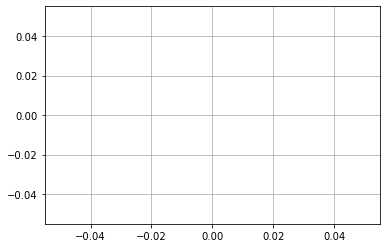

In [28]:
# _*_ 实时信号的可视化模拟 _*_ #
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 生成阻尼正弦信号
def generate_data(length=2500, t=0, step_size=0.05):
    for count in range(length):
        t += step_size
        signal = np.sin(2*np.pi*t)
        damper = np.exp(-t/8.0)
        yield t, signal * damper
        
# 图像中的参数初始化
def initializer():
    peak_val = 1.0
    buffer_val = 0.1
    
    ax.set_ylim(-peak_val * (1 + buffer_val), peak_val * (1 + buffer_val))
    ax.set_xlim(0, 10)
    del x_vals[:]
    del y_vals[:]
    line.set_data(x_vals, y_vals)
    
    return line

# draw
def draw(data):
    # 升级数据
    t, signal = data
    x_vals.append(t)
    y_vals.append(signal)
    x_min, x_max = ax.get_xlim()
    
    if t >= x_max:
        ax.set_xlim(x_min, 2 * x_max)
        ax.figure.canvas.draw()
        
    line.set_data(x_vals, y_vals)
    
    return line

# main
fig, ax = plt.subplots()
ax.grid()

# 提取line
line, = ax.plot([], [], lw=1.5)
x_vals, y_vals = [], []

# animation
animator = animation.FuncAnimation(fig, draw, generate_data, blit=False, interval=10,
                                  repeat=False, init_func=initializer)
plt.show()